# O Titão dos Mares
O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

### Origem da base...
Essa base de dados faz parte do projeto de conclusão do curso de Fundamentos de Data Science I da Udacity, o conjunto de dados tem sua origem no site do Kaggle, de onde os dados foram obtidos - temos aqui dados demográficos e informações de 891 dos 2208 segundo a enciclopédia Titanic, com base nessa informações levantarei questionamentos e respostas.

Link Interessantes:
- [Curso Data Science I da Udacity](https://br.udacity.com/course/python-fundamentos-data-science--nd110)
- [Data set do Titanic](https://www.kaggle.com/c/titanic)
- [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)
- [Repositorio GitHub do Projeto](https://github.com/rodrigo-sm/Curso-DataScience-I)

### Perguntas:
- Qual foi a quantidade de pessoas que sobreviveram e morreram de cada sexo ?
- Qual foi a proporção de sobreviventes pela quantidade de familiares no navio ?
- Qual é a porcentagem de sobreviventes por cada faixa etaria ?
- Qual foi o valor medio da passagem de cada classe ?
- Qual é a porcentagem de sobreviventes de cada classe ?
- Qual é a quantidade de passageiros que não pagou a passagem ? Eles sobreviveram ?

# Leitura do arquivo csv e importação das bibliotecas

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
df_titanic = pd.read_csv('titanic-data-6.csv')

# Tratamento dos dados

#### Remoção de colunas que não serão utilizadas

In [99]:
df_titanic.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

#### Tradução dos rotulos das colunas

In [100]:
df_titanic.columns = ['sobreviveu', 'classe', 'nome', 'sexo', 'idade', 'irmaos_conjuges', 'pais_criancas', 'tarifa', 'embarque']
df_titanic.head()

,sobreviveu,classe,nome,sexo,idade,irmaos_conjuges,pais_criancas,tarifa,embarque
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


#### Avaliar os rotulos das colunas, se existe dados faltantes e os tipos das variaveis

In [101]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
sobreviveu         891 non-null int64
classe             891 non-null int64
nome               891 non-null object
sexo               891 non-null object
idade              714 non-null float64
irmaos_conjuges    891 non-null int64
pais_criancas      891 non-null int64
tarifa             891 non-null float64
embarque           889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


#### Prenchimento dos valores ausentes na coluna age com o numero -1

In [102]:
df_titanic['idade'].fillna(-1, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
sobreviveu         891 non-null int64
classe             891 non-null int64
nome               891 non-null object
sexo               891 non-null object
idade              891 non-null float64
irmaos_conjuges    891 non-null int64
pais_criancas      891 non-null int64
tarifa             891 non-null float64
embarque           889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


# Pergunta 1: Qual foi a quantidade de pessoas que sobreviveram e morreram de cada sexo ?

In [103]:
#  Encontra a quantidade de sobreviventes e mortos de cada sexo utilizando o groupby
homem = df_titanic.query('sexo == "male"').groupby(["sexo", 'sobreviveu']).count()['classe']
mulher = df_titanic.query('sexo == "female"').groupby(["sexo", 'sobreviveu']).count()['classe']

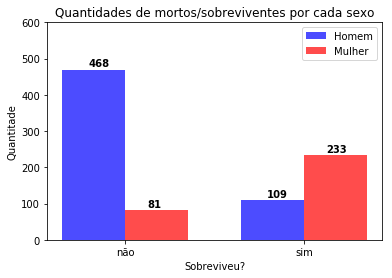

In [104]:
# Criação do grafico
ind = np.arange(len(homem))  # localização no eixo x dos grupos
width = 0.35       # largura das barras

# barras
homem_bars = plt.bar(ind, homem, width, color='b', alpha=.7, label='Homem')
mulher_bars = plt.bar(ind + width, mulher, width, color='r', alpha=.7, label='Mulher')


plt.ylim([0, 600])
# título e rótulos
plt.ylabel('Quantitade')
plt.xlabel('Sobreviveu?')
plt.title('Quantidades de mortos/sobreviventes por cada sexo')
labels = ['não', 'sim']  # rótulos dos marcadores no eixo x
plt.xticks(ind + width / 2, labels)

# função para posicionar os valores acima de cada barra vertical
def posValor(lista, x, y):
    for i, v in enumerate(lista):
        plt.text(i + (x), v + (y), str(v), fontweight='bold')
posValor(homem, -0.03, 10)
posValor(mulher, 0.3, 10)

# legenda
plt.legend()

# Pergunta 2: Qual foi a proporção de sobreviventes pela quantidade de familiares no navio ?

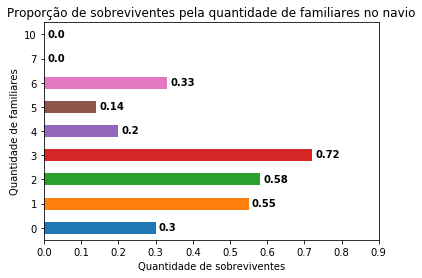

In [105]:
# criação da variavel familia que vai armazena quantidade de pais/filhos/irmãos/cônjuges de cada passageiro
familia = df_titanic['irmaos_conjuges'] + df_titanic['pais_criancas']

# criação da coluna familiares que armazena a variavel familia
df_titanic['familiares'] = familia

# Encontra a proporção de sobreviventes por cada quantidade da variavel parch(número de pais/filhos a bordo)
familiares_total = df_titanic.groupby(["familiares"]).count()["classe"]
familiares_survived = df_titanic.groupby(["familiares"]).sum()["sobreviveu"]
familiares_proportion = familiares_survived / familiares_total
familiares_proportion = round(familiares_proportion, 2)

# Cria o grafico de linha
familiares_proportion.plot(kind="barh", xlim=[0, 0.9])

# Posiciona cada valor do lado de cada barra horizontal
for i, v in enumerate(familiares_proportion):
        plt.text(v + 0.009, i - 0.1, str(v), fontweight='bold')
        
# Titulos
plt.title('Proporção de sobreviventes pela quantidade de familiares no navio')
plt.xlabel('Quantidade de sobreviventes')
plt.ylabel('Quantidade de familiares');

# Pergunta 3: Qual é a porcentagem de sobreviventes por cada faixa etaria ?

#### Faixa Etaria:
- Primeira idade (nascimento, criança, adolescente): de 0 até 20 anos
- Segunda idade (jovem + meia idade): 21 a 59 anos
- Terceira idade (idoso): 60 a 80 anos

In [106]:
# função para determinar a porcentagem de sobrevivência por faixa etaria
def calcPorcAge(min, max):
    idade = df_titanic.query('@min < idade <= @max')
    porcentagem = idade['sobreviveu'].sum() * 100 // idade['sobreviveu'].count()
    return porcentagem

primeira_idade = calcPorcAge(0.0,20)
segunda_idade = calcPorcAge(20, 59)
terceira_idade = calcPorcAge(60, 80)

Text(0.5, 1.0, 'Porcentagem de sobreviventes por cada faixa etaria')

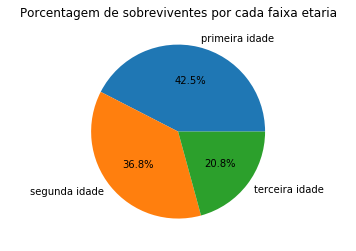

In [107]:
# criação do grafico de pizza
plt.axis('equal')
plt.pie(y_axis, labels = x_axis, autopct='%1.1f%%')
plt.title('Porcentagem de sobreviventes por cada faixa etaria')

# Pergunta 4: Qual foi o valor medio da passagem de cada classe ?

In [108]:
primeira_classe = round(df_titanic.query('classe == 1').mean()['tarifa'], 2)
segunda_classe = round(df_titanic.query('classe == 2').mean()['tarifa'], 2)
terceira_classe = round(df_titanic.query('classe == 3').mean()['tarifa'], 2)
print('Preço medio:\n    1° Classe: {} $\n    2° Classe: {} $\n    3° Classe: {} $\n'.format(primeira_classe, segunda_classe, terceira_classe))

Preço medio:
    1° Classe: 84.15 $
    2° Classe: 20.66 $
    3° Classe: 13.68 $



# Pergunta 5: Qual é a porcentagem de sobreviventes de cada classe ?

In [109]:
# determinar a porcentagem de sobreviventes por cada classe
def calcPorClasse(num, df_titanic):
    classe = df_titanic.query('classe == @num')
    porcentagem = classe['sobreviveu'].sum() * 100 // classe['sobreviveu'].count()
    return porcentagem
primeira_classe = calcPorClasse(1, df_titanic)
segunda_classe = calcPorClasse(2, df_titanic)
terceira_classe = calcPorClasse(3, df_titanic)
lista_classe = [primeira_classe, segunda_idade, terceira_idade]
lista_nome = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']

Text(0.5, 1.0, 'Porcentagem de sobreviventes por cada classe')

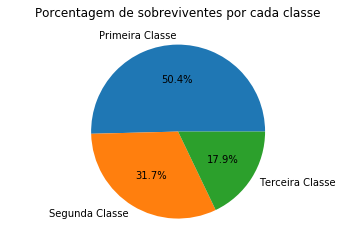

In [110]:
# criação do grafico de pizza
plt.axis('equal')
plt.pie(lista_classe, labels = lista_nome, autopct='%1.1f%%')
plt.title('Porcentagem de sobreviventes por cada classe')

# Pergunta 6: Qual é a quantidade de passageiros que não pagou a passagem ?  Eles sobreviveram ?

In [111]:
# determinar a quantidade de sobreviventes e mortos de passsageiros que nao pagaram a passagem
gratuito = df_titanic.query('tarifa == 0').groupby(["tarifa", 'sobreviveu']).count()['classe']

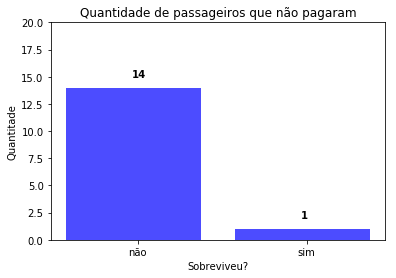

In [112]:
# criação do grafico de barra
ind = np.arange(len(gratuito))  # localização no eixo x dos grupos
width = 0.35       # largura das barras

# barras
gratuito_bars = plt.bar(ind, gratuito, color='b', alpha=.7, label='gratuito')


plt.ylim([0, 20])
# título e rótulos
plt.ylabel('Quantitade')
plt.xlabel('Sobreviveu?')
plt.title('Quantidade de passageiros que não pagaram')
labels = ['não', 'sim']  # rótulos dos marcadores no eixo x
plt.xticks(ind + 0.05  / 2, labels)
posValor(gratuito, -0.01, 1)


## Conclusões
Analisando os dos do acidente do Titanic, fica claro que os passageiros mais jovens e de classe superior tiveram preferência no momento de embarcarem nos botes salva vidas.
Que o preço  medio da passagem de cada classe foi; 84.15 $ 1° Classe, 20.66 2° Classe e 13.68 3° Classe, sendo que 15 pessoas não pagaram e só uma delas sobreviveu.
Que a quantidade de familiares foi um fator relevante para a sobrevivência dos passageiros, passageiros com poucos familiares foram mais propensos a sobreviver.
Que dos 891 passageiros sobreviveram apenas 342, sendo 109 homens e 233 mulheres.

# Limitações
Observou-se que algumas propriedas não possuiam valores para alguns do passageiros. Estas caracteristicas são Age, Cabin e Embarked.
- Medida tomada:
        * Age: Os valores ausentos foram preenchidos com o numero -1, porque não atrapalharia no processo de analise.
        * Cabin e Embarked: Como estas características não foram consideradas na fase de análise optou-se por não alterá-las.
        
- Foi tambem feito o ajuste dos rotulos das colunas, colocando todas as letras em minusculos, sublinhado entre duas palavras e remoção de espaços nas beiradas se existisse.